# DSCI100 Project: Predicting Usage of a Video Game Research Server

#### Name: Rita Yim
#### Class: DSCI100 - 003
#### Student ID: 93068286
#### Session: 2025 Summer Term 1
#### Project Question: #2 - To know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts.

## Familiarization

### Objective of this project: 
**To find which "kinds" of players are most likely to contribute a large amount of data.**

### The Data Set:
**The Players Dataset:**
Categorizes each players through 196 observations, and 7 variables. The variables are as followed:

1. **experience**, character: Players' level of experience.
2. **subscribe**, logical: If the player is subscribed to the game. 
3. **hashedEmail**, character: Encrypted email of player.
4. **played_hours**, double: Play time of player.
5. **name**, character: Name of the player.
6. **gender**, character: Gender of the player.
7. **Age**, double: Age of the player.



**The Sessions Dataset:** 
Contains 1535 observations and 5 variables. It lists the time that each player logged online and offline. The variables are as followed:

1. **hashedEmail**, character: Encrypted email of the player.
2. **start_time**, character: Start time of session
3. **end_time**, character: End time of session
4. **original_start_time**, double: Start time in UNIX timestamp format.
5. **original_end_time**, double: Start time in UNIX timestamp format.

Note: A potential issue is an incorrect timezone, meaning that the time & date of sessions are not in PST. This could give us incorrect results if the question was to observe the most populous time.



In [2]:
library(tidyverse)
library(tidymodels)

options(repr.matrix.max.rows = 6)

players <- read_csv("players.csv")
players

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


In [3]:
sessions <- read_csv("sessions.csv")
sessions

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


## Introduction


Research has shown that video game culture is embedded in the culture of most young people, as they represent a large portion of those who engage virtual video game spaces _(Cipollone, 2014)_. With advancements in technology, games today are more immersive and accessible than ever, spanning consoles, computers, and mobile devices. Interested in finding the correlations and patterns in how users interact with a video game, a Computer Science research team at the University of British Columbia led by Professor Frank Wood gathered gameplay data from a bespoke Minecraft server. In order to better understand behavioral patterns, researchers record players' movements as they move through the virtual world. Finding out which player types are most likely to produce significant amounts of data is a key objective of the project, to enable the team to concentrate recruitment efforts on people who will most effectively contribute to the research.

## Methodology

In order to answer the question, "Which kinds of players are most likely to contribute a large amount of data?" we will tackle this as a classification task. Our specific objective was to determine whether a player is a great data provider based on their personal characteristics and gameplay patterns. We employed a K-Nearest Neighbours (K-NN) classification technique to forecast which categories of individuals are most likely to make significant contributions. We will disregard the `sessions.csv` file because we are more interested in player background than in-game session `players.csv` file and chose the following variables: `Age`, `gender`, `experience`, and `played_hours`. 

`played_hours` will only be used as response variable, to define whether one is a "high data contributor" or not. 

1. First, I will create plots to explore the relationship between age, gender and experience vs played hours respectfully through a visualization plot.

2. Next, I will classify a "high data contributor" is defined as someone in the top 25% of total hours played. Each observation will be assigned to either "high data contributor" or "low data contributor" in a new column `high_contributor`.

3. Then, I will build a model and determine if the model is a good predictor of whether a user is a "high" or "low" data contributor.

   - In particular, 75% of the data will be used as the training data, while the other 25% will be used as testing data.
   - 

## The Results

### Step One: Determining the type of predictive algorithm to use 

#### Prep: Data Wrangling and Cleaning

In [4]:
players_wrangled <- players |>
    select(played_hours, gender, Age, experience)|>
    arrange(desc(played_hours))
players_wrangled

players_wrangled <- players_wrangled |>
        mutate(experience = as_factor(experience)) 

played_hours,gender,Age,experience
<dbl>,<chr>,<dbl>,<chr>
223.1,Male,17,Regular
218.1,Non-binary,20,Regular
178.2,Female,19,Regular
⋮,⋮,⋮,⋮
0,Male,20,Amateur
0,Female,17,Amateur
0,Prefer not to say,17,Amateur


#### Part 1A: Exploring Relationship between Played Hours vs. Age of Player and their experience

Warning message in scale_y_log10(labels = comma):
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


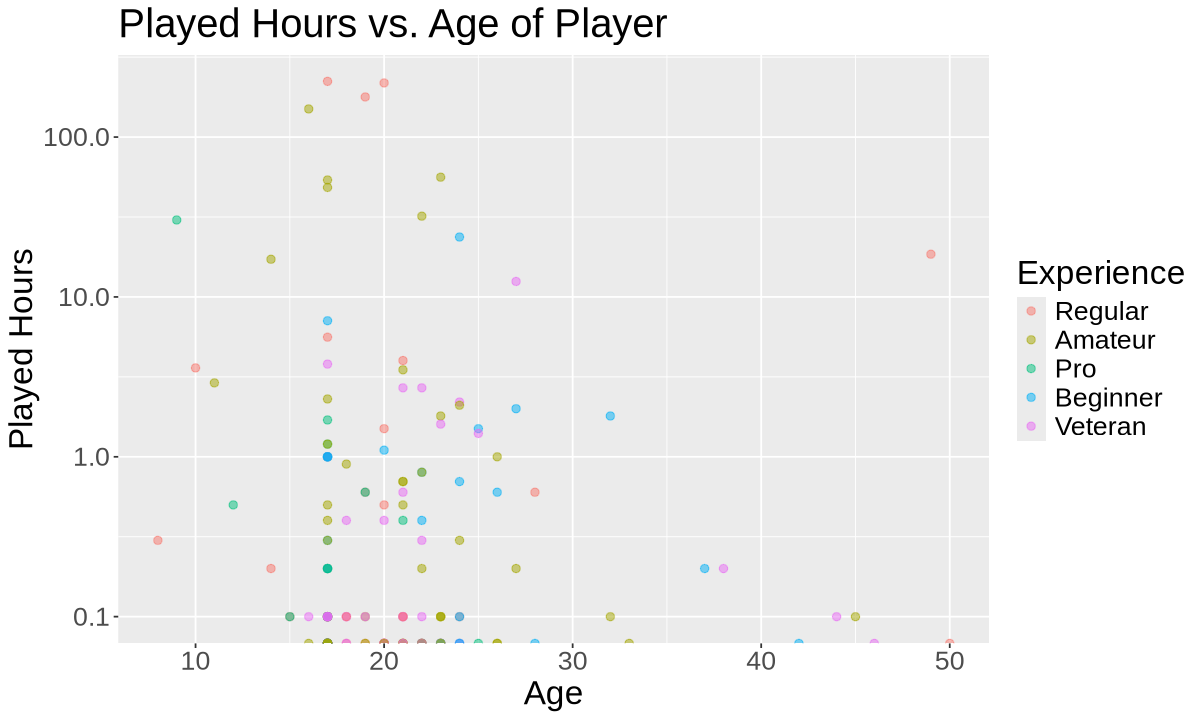

In [5]:
age_plot <- players_wrangled|>
    ggplot(aes(x = Age, y = played_hours, color = experience)) + 
        geom_point(alpha = 0.5, size = 2) + scale_y_log10(labels=comma)+
      labs(x = "Age", y= "Played Hours", color = "Experience", title = "Played Hours vs. Age of Player") +
        theme(text = element_text(size=20))
            options(repr.plot.width = 10, repr.plot.height = 6) 
age_plot

**Figure 1.1 - The above figures shows the Played hours on the Minecraft game vs. the age of the players. The y-axis is shown on a logarithmic scale to allow better visualization. We can see that the data follows a very scattered pattern.**

#### Part 1B: Exploring Relationship between Played Hours vs. Gender

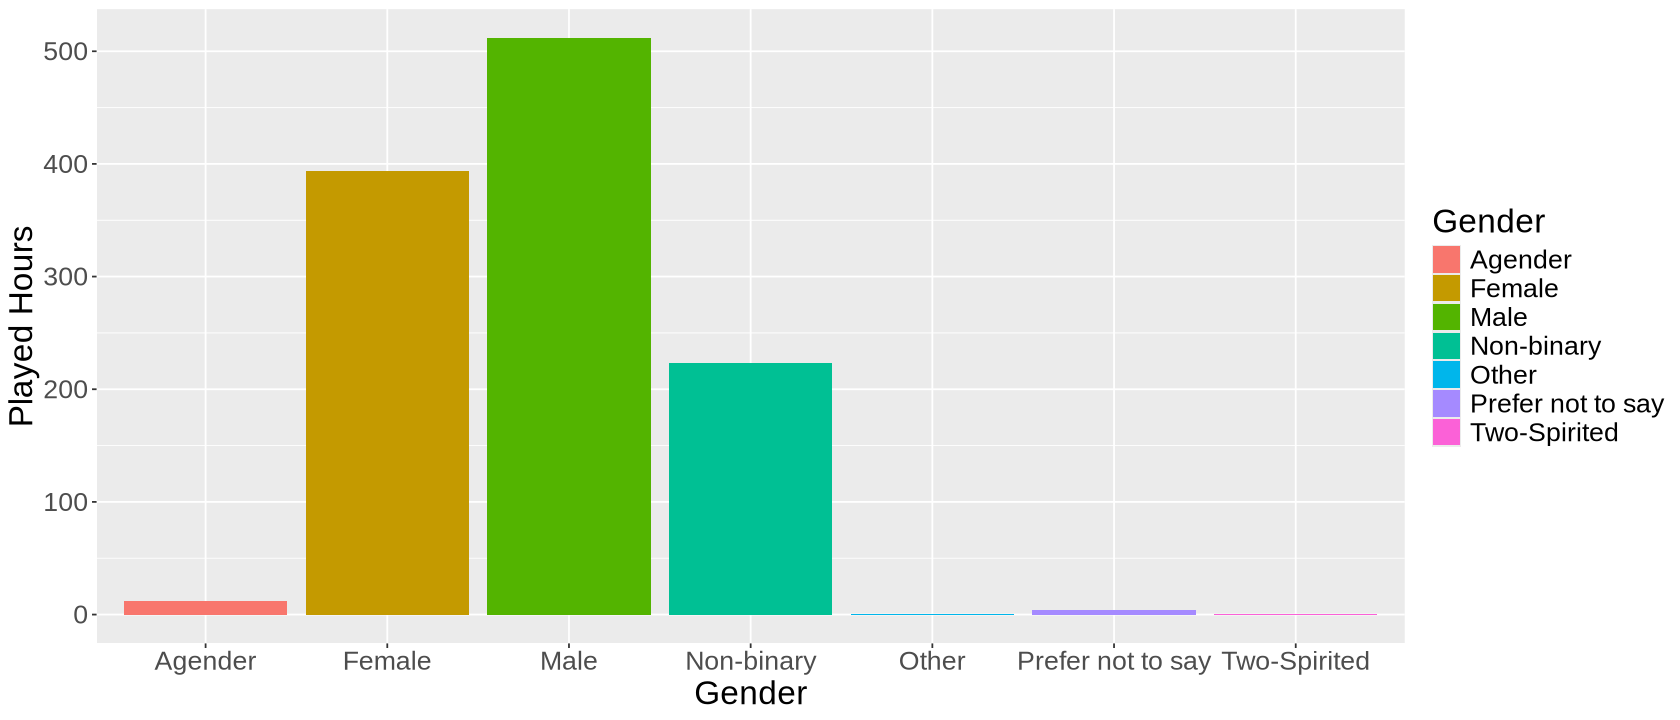

In [6]:
gender_plot <- players_wrangled|>
    ggplot(aes(x = gender, y =  played_hours, fill= gender)) + 
        geom_bar(stat = "identity") + 
      labs(x = "Gender", y= "Played Hours", fill = "Gender") +
        theme(text = element_text(size=20))
    options(repr.plot.width = 14, repr.plot.height = 6) 
gender_plot

**Figure 1.2 - The above figures shows the Played hours on the Minecraft game vs. the gender of the players. From the graph, we can see that the most dominant gender group that plays the most hours on the Minecraft game is male, followed by female and non-binary.**

### Step Two: Defining the Target Variable

#### As mentioned in the Methodology section of this paper, we define "high data contributor" as the top 25% of `played_hours`, while a "low data contributor" is defined as the other 75%. 

In [7]:
players <- players_wrangled |> 
  mutate(high_contributor = if_else(played_hours >= quantile(played_hours, 0.75), "high", "low")) |> 
  mutate(high_contributor = factor(high_contributor))
players


players <- players |>
  mutate(gender = as.factor(gender),
         experience = as.factor(experience),
         high_contributor = as.factor(high_contributor))

played_hours,gender,Age,experience,high_contributor
<dbl>,<chr>,<dbl>,<fct>,<fct>
223.1,Male,17,Regular,high
218.1,Non-binary,20,Regular,high
178.2,Female,19,Regular,high
⋮,⋮,⋮,⋮,⋮
0,Male,20,Amateur,low
0,Female,17,Amateur,low
0,Prefer not to say,17,Amateur,low


### Step Three: Building the Model

#### Part 3A: Splitting and Preprocessing the Data

In [8]:
set.seed(123)

data_split <- initial_split(players, prop = 0.75, strata = high_contributor)
train_data <- training(data_split)
test_data <- testing(data_split)

players_recipe <- recipe(high_contributor ~ Age + gender + experience, data = train_data) |>
  step_other(gender, threshold = 0.005, other = "Other") |>  # group rare levels into "Other"
  step_novel(all_nominal_predictors()) |>
  step_dummy(all_nominal_predictors()) |>
  step_zv(all_predictors()) |>
  step_normalize(all_numeric_predictors())

train_data <- players |>
  select(Age, gender, experience, played_hours, high_contributor) |>
  drop_na() |>
  mutate(
    gender = as.factor(gender),
    high_contributor = as.factor(high_contributor)  # just in case
  )

str(train_data)
levels(train_data$gender)

summary(train_data$gender)

tibble [194 × 5] (S3: tbl_df/tbl/data.frame)
 $ Age             : num [1:194] 17 20 19 16 23 17 17 22 9 24 ...
 $ gender          : Factor w/ 7 levels "Agender","Female",..: 3 4 2 2 3 3 2 3 3 3 ...
 $ experience      : Factor w/ 5 levels "Regular","Amateur",..: 1 1 1 2 2 2 2 2 3 4 ...
 $ played_hours    : num [1:194] 223.1 218.1 178.2 150 56.1 ...
 $ high_contributor: Factor w/ 2 levels "high","low": 1 1 1 1 1 1 1 1 1 1 ...


[1] "Agender"           "Female"            "Male"             
[4] "Non-binary"        "Other"             "Prefer not to say"
[7] "Two-Spirited"

Agender            Female              Male        Non-binary 
                2                37               124                15 
            Other Prefer not to say      Two-Spirited 
                0                11                 5

#### Part 3B: Training the Model 

In [9]:
set.seed(123)

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 8) |>
  set_engine("kknn") |>
  set_mode("classification")

knn_fit <- workflow() |>
  add_recipe(players_recipe) |>
  add_model(knn_spec) |>
  fit(data = train_data)

knn_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
5 Recipe Steps

• step_other()
• step_novel()
• step_dummy()
• step_zv()
• step_normalize()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(8,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.3092784
Best kernel: rectangular
Best k: 8

In [10]:
players_predictions <- predict(knn_fit, test_data) |>
  bind_cols(test_data)

players_predictions

.pred_class,played_hours,gender,Age,experience,high_contributor
<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>
low,223.1,Male,17,Regular,high
high,218.1,Non-binary,20,Regular,high
low,53.9,Male,17,Amateur,high
⋮,⋮,⋮,⋮,⋮,⋮
low,0,Agender,20,Veteran,low
low,0,Male,17,Amateur,low
low,0,Male,20,Amateur,low


In [11]:
## Accuracy Value
players_predictions |>
  metrics(truth = high_contributor, estimate = .pred_class) |>
  filter(.metric == "accuracy")

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.72


In [12]:
## Precision Value
players_predictions |> pull(high_contributor) |> levels()

players_predictions |>
  precision(truth = high_contributor, estimate = .pred_class, event_level = "first")


[1] "high" "low"

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,binary,0.5


In [13]:
## Recall Value

players_predictions  |>
  recall(truth =high_contributor, estimate = .pred_class, event_level = "first")

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,binary,0.2142857


In [14]:
confusion <- players_predictions  |>
             conf_mat(truth = high_contributor, estimate = .pred_class)
confusion

          Truth
Prediction high low
      high    3   3
      low    11  33

#### Part 3C: Tuning the Classifier

In [15]:
# create the 25/75 split of the training data into training and validation
player_split <- initial_split(train_data, prop = 0.75, strata = high_contributor)
player_subtrain <- training(player_split)
player_validation <- testing(player_split)

# recreate the standardization recipe from before
# (since it must be based on the training data)
player_tc_recipe <- recipe(high_contributor ~ Age + experience + gender, data = player_subtrain) 

# fit the knn model (we can reuse the old knn_spec model from before)
knnn_fit <- workflow() |>
  add_recipe(player_tc_recipe) |>
  add_model(knn_spec) |>
  fit(data = player_subtrain)

In [16]:
## Get predictions on the validation data
validation_predicted <- predict(knnn_fit, player_validation) |>
  bind_cols(player_validation)

## Get the accuracy
acc <- validation_predicted |>
  metrics(truth = high_contributor, estimate = .pred_class) |>
  filter(.metric == "accuracy") |>
  select(.estimate) |>
  pull()
acc

[1] 0.62

In [17]:
players_vfold_5 <- vfold_cv(player_subtrain, v = 5, strata = high_contributor)

vfold_metrics_5 <- workflow() |>
                  add_recipe(player_tc_recipe) |>
                  add_model(knn_spec) |>
                  fit_resamples(resamples = players_vfold_5) |>
                  collect_metrics()

vfold_metrics_5

.metric,.estimator,mean,n,std_err,.config
<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
accuracy,binary,0.6738916,5,0.02932586,Preprocessor1_Model1
roc_auc,binary,0.6342687,5,0.03577608,Preprocessor1_Model1


### Part 3C: Parameter Value Selection

In [18]:
knn_spec <- nearest_neighbor(weight_func = "rectangular",
                             neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

In [19]:
k_vals <- tibble(neighbors = seq(from = 1, to = 10, by = 1))

knn_results <- workflow() |>
  add_recipe(player_tc_recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = players_vfold_5, grid = k_vals) |>
  collect_metrics()

accuracies <- knn_results |>
  filter(.metric == "accuracy")

accuracies


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.5628079,5,0.04084885,Preprocessor1_Model01
2,accuracy,binary,0.5628079,5,0.04084885,Preprocessor1_Model02
3,accuracy,binary,0.6881773,5,0.03338870,Preprocessor1_Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
8,accuracy,binary,0.6738916,5,0.02932586,Preprocessor1_Model08
9,accuracy,binary,0.7088670,5,0.02694090,Preprocessor1_Model09
10,accuracy,binary,0.6812808,5,0.03222368,Preprocessor1_Model10


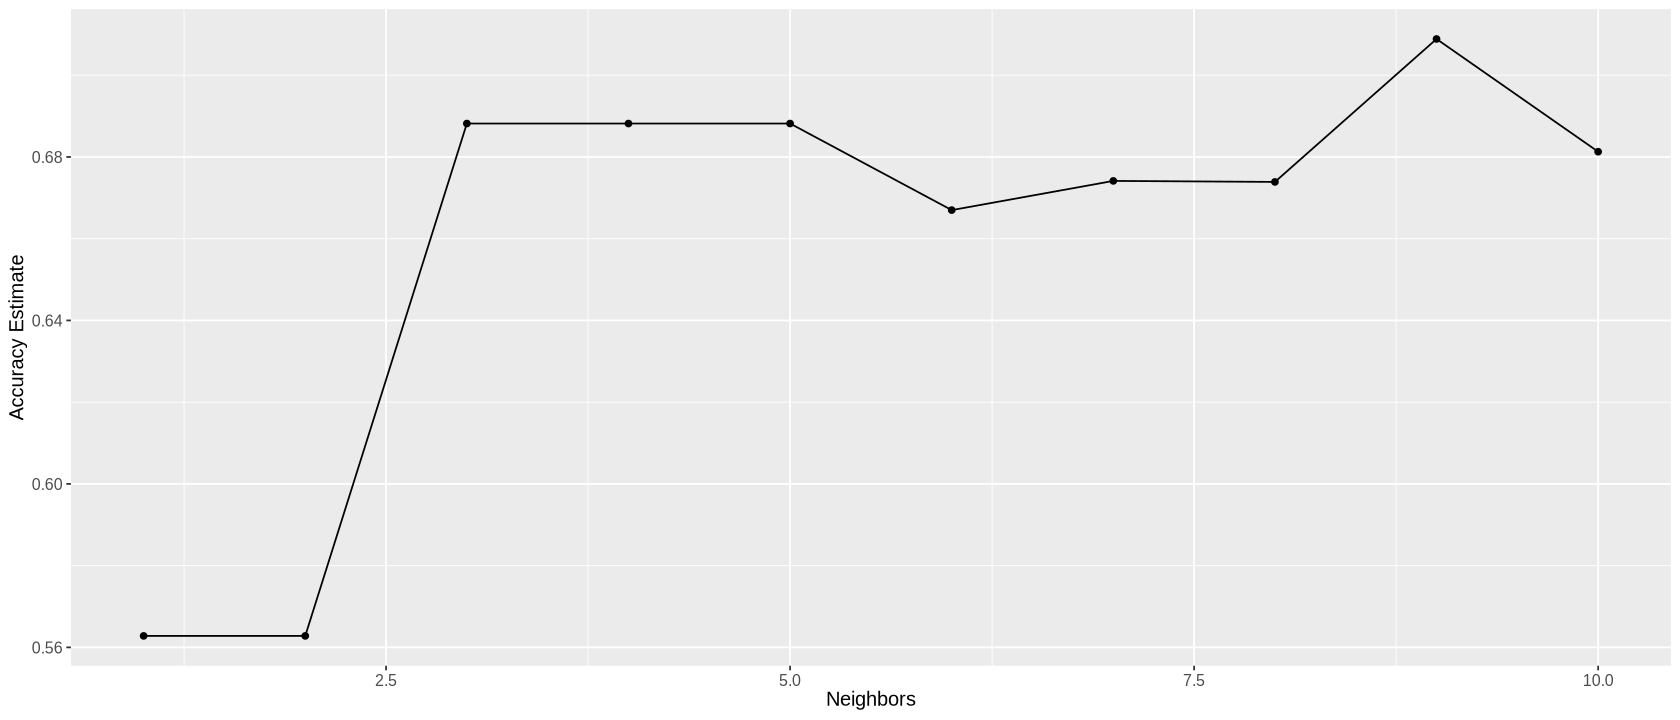

In [20]:
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") +
  theme(text = element_text(size = 12))

accuracy_vs_k

**Figure 3.1: The above graph shows the Accuracy Estimate vs. Number of Neighbours used in the K-NN Algorithm, according to a 5-fold cross validation**

In [375]:
best_k <- accuracies |>
        arrange(desc(mean)) |>
        head(1) |>
        pull(neighbors)
best_k

[1] 21

### Part 3D: Evaluating on Test Set

In [376]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) |>
  set_engine("kknn") |>
  set_mode("classification")

knn_fit <- workflow() |>
  add_recipe(players_recipe) |>
  add_model(knn_spec) |>
  fit(data = train_data)

knn_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
5 Recipe Steps

• step_other()
• step_novel()
• step_dummy()
• step_zv()
• step_normalize()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(21,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.2886598
Best kernel: rectangular
Best k: 21

In [369]:
players_test_predictions <- predict(knn_fit, test_data) |>
  bind_cols(test_data)

players_test_predictions |>
  metrics(truth = high_contributor, estimate = .pred_class) |>
  filter(.metric == "accuracy")

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7


## Discussion

## References

[1] Cipollone, M., & Schifter, C. (2014, April). (PDF) Minecraft as a creative tool: A case study. ResearchGate. https://www.researchgate.net/publication/287093943_Minecraft_as_a_creative_tool_A_case_study

[2] Peng, T. T., Trevor Campbell, and Melissa Lee Foreword by Roger. (n.d.). Data Science. In datasciencebook.ca. https://datasciencebook.ca/